### Система 1 (вариант 4)

Рассмотрим модель биологического сообщества хищник-жертва, учитывающей
существование нижней критической плотности популяции жертвы,
а также учитывающей миграцию популяций хищников и жертв:

$$
\begin{cases}
\dot N_1 = (\epsilon_1 - \gamma_1 N_1)N_1 - d(N_1 - N_2), \\
\dot N_2 = \epsilon_1 N_2 (N_2 - L) \frac{K - N_2}{K} - \alpha N_2 N_3 + d(N_1 - N_2), \\
\dot N_3 = -\epsilon_3 N_3 + k \alpha N_2 N_3,
\end{cases}
$$

где $N_1(t)$ – плотность популяции жертв, недостижимых для хищников, $N_2(t)$
– плотность популяции жертв, достижимых для хищников, $N_3(t)$ – плотность
популяции хищников; $\epsilon_i$, $\gamma_i$, $\alpha$, $k$, $K$, $d$ – положительные константы.

In [1]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import *
from IPython.display import display

In [2]:
epsilon_1 = 0.57
gamma_1 = 0.54
d = 1.0
L = 0.94
K = 0.36
alpha = 0.91
epsilon_3 = 0.38
k = 1.0
N_01 = 0.97
N_02 = 0.83
N_03 = 0.84

In [3]:
def N_dot(N, t=0):
    N_dot_1 = (epsilon_1 - gamma_1 * N[0]) * N[0] - d * (N[0] - N[1])
    N_dot_2 = epsilon_1 * N[1] * (N[1] - L) * (K - N[1]) / K - alpha * N[1] * N[2] + d * (N[0] - N[1])
    N_dot_3 = -epsilon_3 * N[2] + k * alpha * N[1] * N[2]
    return np.array([N_dot_1, N_dot_2, N_dot_3])

def plot():
    interval = np.arange(0, 1.2, 0.2)
    states = np.meshgrid(interval, interval, interval)
    velocities = N_dot(states)

    t = np.arange(0, 100, 0.1)
    N_init = np.array([N_01, N_02, N_03])
    N = odeint(N_dot, N_init, t)
    
    x, y, z = states
    u, v, w = velocities
    
    ax.cla()
    ax.quiver(x, y, z, u, v, w, length=0.15)
    ax.plot(N[:,0], N[:,1], N[:,2], color='r')

    ax.set_xlabel('$N_1$')
    ax.set_ylabel('$N_2$')
    ax.set_zlabel('$N_3$')
    
    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([-0.1, 1.1])
    ax.set_zlim([-0.1, 1.1])
    
    plt.show()

<IPython.core.display.Javascript object>


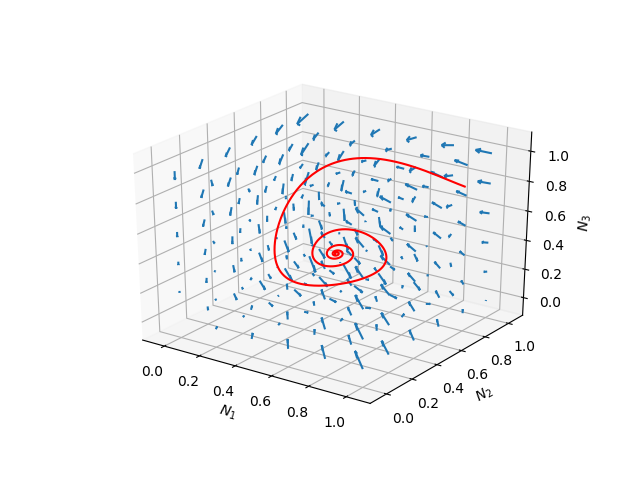

In [4]:
fig = plt.figure()
ax = fig.gca(projection='3d')
    
epsilon_1_slider = FloatSlider(description='$\epsilon_1$', min=0.01, max=1, step=0.01, value=epsilon_1)
def epsilon_1_observer(info):
    global epsilon_1
    epsilon_1 = info.new
    plot()
epsilon_1_slider.observe(epsilon_1_observer, names='value')

gamma_1_slider = FloatSlider(description='$\gamma_1$', min=0.01, max=1, step=0.01, value=gamma_1)
def gamma_1_observer(info):
    global gamma_1
    gamma_1 = info.new
    plot()
gamma_1_slider.observe(gamma_1_observer, names='value')

d_slider = FloatSlider(description='$d$', min=0.01, max=1, step=0.01, value=d)
def d_observer(info):
    global d
    d = info.new
    plot()
d_slider.observe(d_observer, names='value')

L_slider = FloatSlider(description='$L$', min=0.01, max=1, step=0.01, value=L)
def L_observer(info):
    global L
    L = info.new
    plot()
L_slider.observe(L_observer, names='value')

K_slider = FloatSlider(description='$K$', min=0.01, max=1, step=0.01, value=K)
def K_observer(info):
    global K
    K = info.new
    plot()
K_slider.observe(K_observer, names='value')

alpha_slider = FloatSlider(description='$\\alpha$', min=0.01, max=1, step=0.01, value=alpha)
def alpha_observer(info):
    global alpha
    alpha = info.new
    plot()
alpha_slider.observe(alpha_observer, names='value')

epsilon_3_slider = FloatSlider(description='$\epsilon_3$', min=0.01, max=1, step=0.01, value=epsilon_3)
def epsilon_3_observer(info):
    global epsilon_3
    epsilon_3 = info.new
    plot()
epsilon_3_slider.observe(epsilon_3_observer, names='value')

k_slider = FloatSlider(description='$k$', min=0.01, max=1, step=0.01, value=k)
def k_observer(info):
    global k
    k = info.new
    plot()
k_slider.observe(k_observer, names='value')

N_01_slider = FloatSlider(description='$N_{01}$', min=0.01, max=1, step=0.01, value=N_01)
def N_01_observer(info):
    global N_01
    N_01 = info.new
    plot()
N_01_slider.observe(N_01_observer, names='value')

N_02_slider = FloatSlider(description='$N_{02}$', min=0.01, max=1, step=0.01, value=N_02)
def N_02_observer(info):
    global N_02
    N_02 = info.new
    plot()
N_02_slider.observe(N_02_observer, names='value')

N_03_slider = FloatSlider(description='$N_{03}$', min=0.01, max=1, step=0.01, value=N_03)
def N_03_observer(info):
    global N_03
    N_03 = info.new
    plot()
N_03_slider.observe(N_03_observer, names='value')

vbox1 = VBox([epsilon_1_slider, gamma_1_slider, d_slider, L_slider])
vbox2 = VBox([K_slider, alpha_slider, epsilon_3_slider, k_slider])
vbox3 = VBox([N_01_slider, N_02_slider, N_03_slider])
hbox = HBox([vbox1, vbox2, vbox3])
display(hbox)

plot()